# **Task 4**
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitude towards specific topics or brands.

## **Introduction**
The purpose of this task is to analyze and visualize public sentiment towards different airlines using the Twitter US Airline Sentiment Dataset. This dataset contains tweets labeled as positive, negative, or neutral, along with additional details such as airline names, reasons for negative feedback, and timestamps. By exploring sentiment distributions, identifying common complaint categories, and visualizing trends over time, I aim to uncover key patterns in customer opinions and provide insights into overall brand perception.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset and display its shape and first few rows
df = pd.read_csv(r"C:\Users\SoumenD\Downloads\Tweets.csv\Tweets.csv")
print(df.shape)
df.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Convert 'tweet_created' column to datetime format
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [ ]:
# Display the count of values in 'airline_sentiment' and 'airline' columns
print(df['airline_sentiment'].value_counts())
print("\n")
print(df['airline'].value_counts())

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


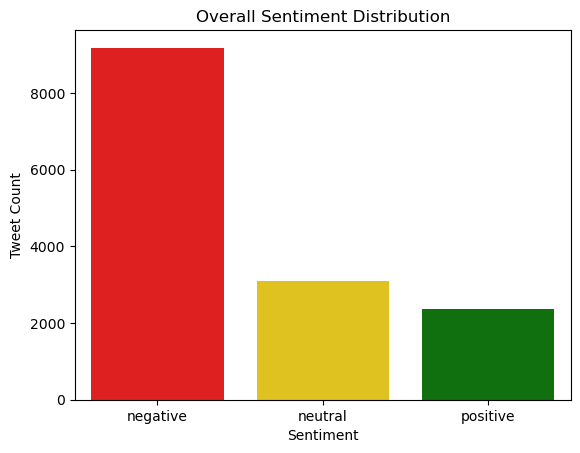

In [ ]:
# Visualize the overall sentiment distribution

sentiment_palette = {
    "negative": "red",
    "neutral": "gold",   
    "positive": "green"
}

sns.countplot(x='airline_sentiment', hue='airline_sentiment', data=df, order=df['airline_sentiment'].value_counts().index, 
              palette=sentiment_palette, legend=False)   # legend not needed since x and hue are same

plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

### **Insights🔎**

When people take to Twitter to talk about airlines, the overwhelming majority of voices are negative. Complaints and frustrations dominate the conversation, far outnumbering positive experiences. Neutral tweets sit in the middle, showing that a fair number of users share updates or facts without strong emotion. But what stands out most is how rare positive feedback is compared to the flood of criticism.

This paints a clear picture: on social media, customers are far more vocal about problems than praise, making negative sentiment the loudest voice in the room.

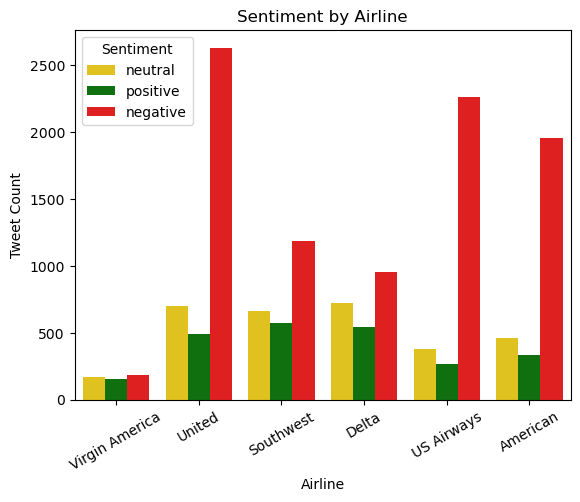

In [ ]:
# Visualize sentiment distribution by airline

sns.countplot(x='airline', hue='airline_sentiment', data=df, palette=sentiment_palette)
plt.title("Sentiment by Airline")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=30)
plt.legend(title="Sentiment")
plt.show()


### **Insights🔎**
Looking across airlines, one thing is unmistakable: negative sentiment dominates every carrier. United and US Airways, in particular, face the harshest criticism, with towering red bars showing a flood of unhappy customers. Airlines like Southwest and Delta see a healthier balance, with a fair share of neutral and positive mentions, though negatives still outweigh them. Virgin America stands out at the other end — fewer tweets overall, but also fewer complaints compared to larger airlines.

The story is clear: while all airlines face criticism, some, especially United, bear the brunt of customer dissatisfaction much more loudly than others.

C:\Users\SoumenD\AppData\Local\Temp\ipykernel_26460\2581721686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=neg_reasons.index, x=neg_reasons.values, palette="Reds_r")


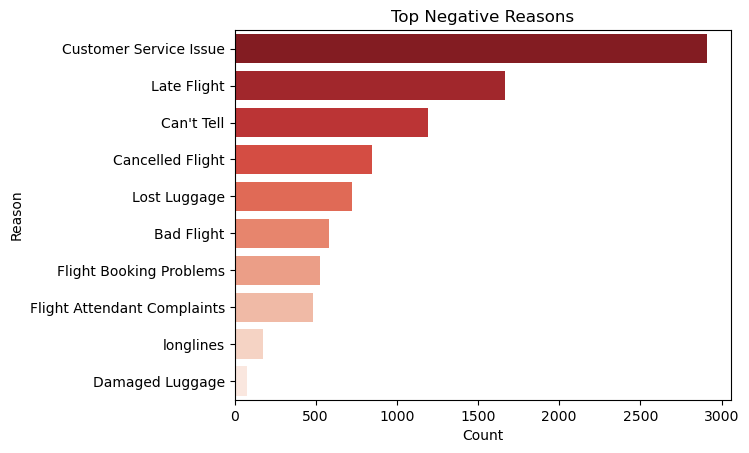

In [ ]:
# Visualize top negative reasons

neg_reasons = df['negativereason'].value_counts().head(10)
sns.barplot(y=neg_reasons.index, x=neg_reasons.values, palette="Reds_r")
plt.title("Top Negative Reasons")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

### **Insights🔎**

When travelers complain about airlines, one issue rises far above the rest: customer service. The sheer volume of grievances here dwarfs every other category, showing that how passengers are treated matters just as much as flight operations. Delays are the next biggest frustration, followed by cancelled flights and lost luggage — all classic pain points in air travel. Smaller but still notable complaints include booking troubles, bad flight experiences, and even damaged luggage.

The story these complaints tell is that while operational issues cause irritation, it is poor customer service that leaves the deepest mark on passengers’ minds.

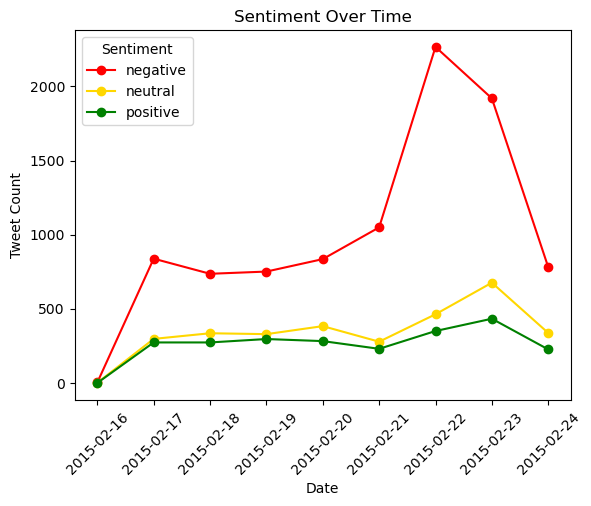

In [ ]:
# Visualize sentiment over time

sentiment_over_time = df.groupby([df['tweet_created'].dt.date, 'airline_sentiment']).size().unstack(fill_value=0)
sentiment_over_time.plot(kind='line', marker='o', color=['red', 'gold', 'green'])
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


### **Insights🔎**
The graph tells a story of a dominant negative narrative. Starting on February 16, negative sentiment (red line) quickly takes the lead and stays far above positive and neutral tweets for the entire period.

It reaches a dramatic peak on February 22 with over 2,200 tweets, indicating a major event or controversy that caused a massive wave of negativity. After this high point, the negative tweets drop sharply, suggesting the immediate impact of the event has faded.

Throughout this period, both neutral (yellow) and positive (green) sentiments remain relatively low and stable. The neutral line is consistently higher than the positive one, showing that many people were either reporting facts or were undecided on the issue, while positive opinions were always in the minority.